In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import Image
import imageio
import csv

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from iLQR import iLQR, Path

In [2]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

In [3]:
# Load Path
centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)
solver = iLQR()
solver.update_path(path)

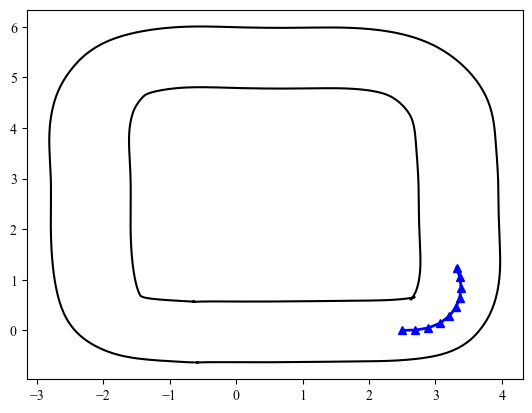

In [31]:
# define some parameters
n = 10
x_cur = np.array([2.5, 0, 2, 0, 0])  # Initial state.
init_control = np.zeros((2, n))

plan = solver.plan(x_cur, init_control)

states = plan['states']

plt.clf()
path.plot_track()
plt.plot(states[0, :], states[1, :],'-^', linewidth=2, c='b')


In [25]:
print(solver.backward_pass._cache_size())

1


Text(0.5, 1.0, 'Velocity')

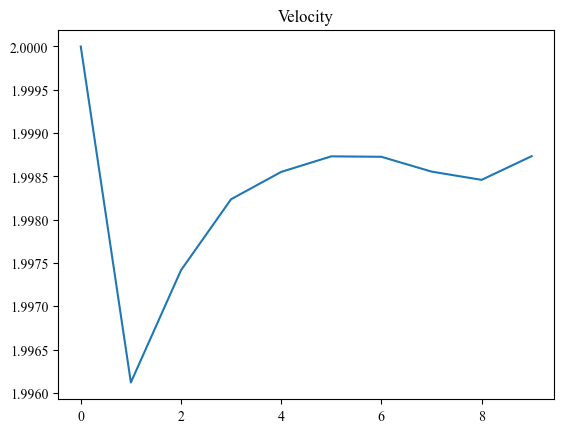

In [26]:
plt.plot(states[2,:])
plt.title('Velocity')

Text(0.5, 1.0, 'Steering Angle')

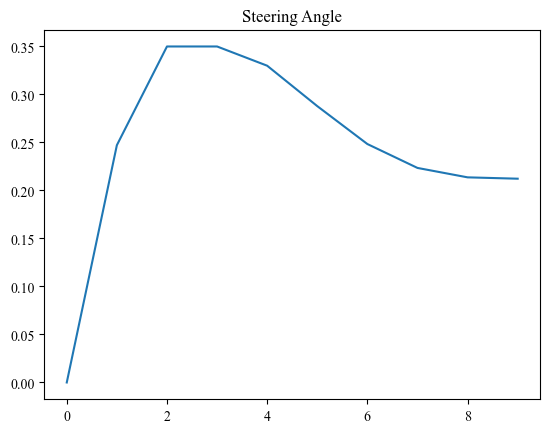

In [27]:
plt.plot(states[4,:])
plt.title('Steering Angle')

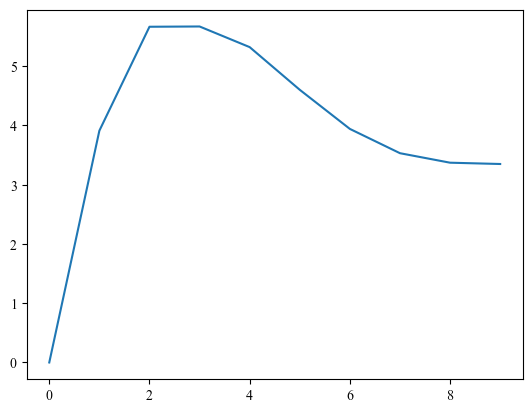

In [28]:
# centrifugal acceleration
a = states[2, :]**2 / 0.257 * np.tan(states[-1, :])
plt.plot(a)
